#UAS Daffa Rizki Rizaly - 2301931251
DNA Dataset

#Import Library

In [ ]:
import tensorflow as tf 
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from keras.optimizers import Adam

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder

* **tensorflow** sebagai library machine learning yang digunakan untuk mengakses keras.
* **keras** merupakan API untuk deep learning.
* **Sequential** adalah tipe model yang digunakan karena hanya memiliki 1 input tensor dan 1 output tensor.
* **Conv1D** digunakan untuk membuat layer convulutional 1D. Pada dataset ini , saya menggunakan 1D karena dataset merupakan data 1D
* **MaxPooling1D** digunakan untuk mengurangi dimensi feature map tanpa menghilang bagian paling penting.
* **Dense** menambahkan layer yang terkonek dengan erat
* **Flatten** digunakan untuk mengubah 2dimensional menjadi 1 linear vector.
* **Dropout** digunakan untuk mengdrop sebuah random neuron,'
* **Adam** adalah optimizer yang saya gunakan karena memiliki performa yang terbaik.

* **train_test_split** digunakan untuk splitting data ke validation set
* **PCA** digunakan sebagai library untuk melakukan pca dan pengurangan dimensi gambar
* **StandardScaler** digunakan untuk normalisasi data features untuk memperbagus hasil.




#Import Dataset

In [ ]:
#Pada bagian ini kita akan membaca dataset dengan pandas dan saya masukan ke data
data = pd.read_csv('rawdata.csv')
data

,SAMPLE_ID,snp_0,snp_1,snp_2,snp_3,snp_4,snp_5,snp_6,snp_7,snp_8,snp_9,snp_10,snp_11,snp_12,snp_13,snp_14,snp_15,snp_16,snp_17,snp_18,snp_19,snp_20,snp_21,snp_22,snp_23,snp_24,snp_25,snp_26,snp_27,snp_28,snp_29,snp_30,snp_31,snp_32,snp_33,snp_34,snp_35,snp_36,snp_37,snp_38,...,snp_9962,snp_9963,snp_9964,snp_9965,snp_9966,snp_9967,snp_9968,snp_9969,snp_9970,snp_9971,snp_9972,snp_9973,snp_9974,snp_9975,snp_9976,snp_9977,snp_9978,snp_9979,snp_9980,snp_9981,snp_9982,snp_9983,snp_9984,snp_9985,snp_9986,snp_9987,snp_9988,snp_9989,snp_9990,snp_9991,snp_9992,snp_9993,snp_9994,snp_9995,snp_9996,snp_9997,snp_9998,snp_9999,snp_10000,STATUS
0,HCB181,1,0,0,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,0,0,2,2,2,2,1,1,2,2,2,2,2,2,0,0,0,0,2,2,...,1,2,2,1,2,1,2,2,1,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,1,2,1,2,1
1,HCB182,1,0,0,1,1,2,2,1,2,2,2,1,2,1,2,2,2,2,2,0,0,2,2,2,2,2,2,1,1,1,2,0,0,0,0,0,0,2,2,...,1,2,2,1,2,1,2,2,1,2,2,2,2,2,2,1,2,2,2,1,2,1,2,2,2,2,2,2,2,1,1,1,2,2,2,1,2,2,2,2
2,HCB183,1,0,0,1,2,2,2,1,2,2,2,1,2,1,1,2,2,2,2,0,0,2,2,2,2,1,2,1,2,1,2,2,2,0,0,0,0,2,2,...,1,2,2,2,2,1,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,1,1,2,2,2,1,2,2,2,1,2,2
3,HCB184,1,0,0,1,1,2,2,1,2,2,2,1,1,2,2,2,2,2,2,0,0,2,2,2,2,1,1,2,2,2,2,2,2,0,0,0,0,2,2,...,1,1,1,1,2,1,2,1,1,2,2,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,1,2,2,2,1,2,2
4,HCB185,1,0,0,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,1,2,...,1,1,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,1,2,2,2,2,2,1,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,JPT265,1,0,0,1,1,1,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,1,1,2,2,1,1,2
85,JPT266,1,0,0,1,2,2,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,1,2,2,2,1,2,2,2,1,2,...,1,1,2,1,2,1,2,1,1,2,2,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,1,2,2,2,1,2,2
86,JPT267,1,0,0,1,2,1,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2,0,0,0,0,1,2,2,2,2,2,0,0,2,2,2,2,1,2,...,1,1,2,1,1,1,1,1,1,2,2,2,2,2,2,1,2,2,2,1,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,1,1,2,2,1
87,JPT268,1,0,0,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,...,1,2,2,1,1,1,1,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,1,2,1,1,1


In [ ]:
# Saya mengdrop colomn sample_ID karena tidak dibutuhkan.
data = data.drop(['SAMPLE_ID'], axis=1)
data

,snp_0,snp_1,snp_2,snp_3,snp_4,snp_5,snp_6,snp_7,snp_8,snp_9,snp_10,snp_11,snp_12,snp_13,snp_14,snp_15,snp_16,snp_17,snp_18,snp_19,snp_20,snp_21,snp_22,snp_23,snp_24,snp_25,snp_26,snp_27,snp_28,snp_29,snp_30,snp_31,snp_32,snp_33,snp_34,snp_35,snp_36,snp_37,snp_38,snp_39,...,snp_9962,snp_9963,snp_9964,snp_9965,snp_9966,snp_9967,snp_9968,snp_9969,snp_9970,snp_9971,snp_9972,snp_9973,snp_9974,snp_9975,snp_9976,snp_9977,snp_9978,snp_9979,snp_9980,snp_9981,snp_9982,snp_9983,snp_9984,snp_9985,snp_9986,snp_9987,snp_9988,snp_9989,snp_9990,snp_9991,snp_9992,snp_9993,snp_9994,snp_9995,snp_9996,snp_9997,snp_9998,snp_9999,snp_10000,STATUS
0,1,0,0,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,0,0,2,2,2,2,1,1,2,2,2,2,2,2,0,0,0,0,2,2,1,...,1,2,2,1,2,1,2,2,1,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,1,2,1,2,1
1,1,0,0,1,1,2,2,1,2,2,2,1,2,1,2,2,2,2,2,0,0,2,2,2,2,2,2,1,1,1,2,0,0,0,0,0,0,2,2,2,...,1,2,2,1,2,1,2,2,1,2,2,2,2,2,2,1,2,2,2,1,2,1,2,2,2,2,2,2,2,1,1,1,2,2,2,1,2,2,2,2
2,1,0,0,1,2,2,2,1,2,2,2,1,2,1,1,2,2,2,2,0,0,2,2,2,2,1,2,1,2,1,2,2,2,0,0,0,0,2,2,1,...,1,2,2,2,2,1,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,1,1,2,2,2,1,2,2,2,1,2,2
3,1,0,0,1,1,2,2,1,2,2,2,1,1,2,2,2,2,2,2,0,0,2,2,2,2,1,1,2,2,2,2,2,2,0,0,0,0,2,2,2,...,1,1,1,1,2,1,2,1,1,2,2,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,1,2,2,2,1,2,2
4,1,0,0,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,1,2,1,...,1,1,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,1,2,2,2,2,2,1,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1,0,0,1,1,1,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,...,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,1,1,2,2,1,1,2
85,1,0,0,1,2,2,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,1,2,2,2,1,2,2,2,1,2,2,...,1,1,2,1,2,1,2,1,1,2,2,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,1,2,2,2,1,2,2
86,1,0,0,1,2,1,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2,0,0,0,0,1,2,2,2,2,2,0,0,2,2,2,2,1,2,1,...,1,1,2,1,1,1,1,1,1,2,2,2,2,2,2,1,2,2,2,1,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,1,1,2,2,1
87,1,0,0,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,1,2,2,1,1,1,1,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,1,2,1,1,1


In [ ]:
#Disini kita akan membagi features dan label
Features = data.iloc[:, :-1].values
Labels = data.iloc[:, -1].values.reshape(-1,1)    

In [ ]:
#Kita akan melakukan Normalisasi dataset
scaler = StandardScaler()
dataset= scaler.fit_transform(Features)

In [ ]:
# Split Dataset for test
X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size = 0.3, random_state=42)

In [ ]:
# Split Dataset for Validation
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

In [ ]:
#Reshape features 
#Kita akan reshape features sedimikian rupa untuk dapat dimasukan kedalam CNN.
input_shape = (X_train.shape[1], 1)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],  1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_validate = X_validate.reshape(X_validate.shape[0],X_validate.shape[1],1)

print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_test.shape))
print('x_validate shape: {}'.format(X_validate.shape))

x_train shape: (49, 10001, 1)
x_test shape: (27, 10001, 1)
x_validate shape: (13, 10001, 1)


Pada bagian ini kita akan mengkonfigurasi 2 cnn model kita. 

In [ ]:
# One-hot encoding
#Kita akan encoding agar hasilnya optimal
Encoder = OneHotEncoder()
y_train = Encoder.fit_transform(y_train).toarray()
y_test = Encoder.transform(y_test).toarray()
y_validate = Encoder.transform(y_validate).toarray()

In [ ]:
#Pada bagian ini, saya membuat 2 model layer.
name = '1_Layer'
cnn_model_1 = Sequential([
    #Menambahkan layer convulational 1D dengan 32 filter , kernel size 3*3 dengan activation relu sebagai default.                      
    Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape, name='Conv2D-1'),

    #Mengurangi dimensional tanpa menghilangkan bagian paling penting dengan size 2*2 
    MaxPooling1D(pool_size=2, name='MaxPool'),

    #Mengdrop random neuron untuk mencegah overfitting.
    Dropout(0.2, name='Dropout'),

    #Meratakan 2d menjadi 1 linear vector
    Flatten(name='flatten'),

    #Menambahkan layer dengan ukuran 32 yang terhubung ketat.
    Dense(32, activation='relu', name='Dense'),

    #Menambahkan layer dengan ukuran 2 yaitu jumlah label yang terhubung ketat.
    Dense(2, activation='softmax', name='Output')
], name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    #Menambahkan layer convulational 1D dengan 32 filter , kernel size 3*3 dengan activation relu sebagai default.
    Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape, name='Conv2D-1'),
    
    #Mengurangi dimensional tanpa menghilangkan bagian paling penting dengan size 2*2 
    MaxPooling1D(pool_size=2, name='MaxPool'),

    #Mengdrop random neuron untuk mencegah overfitting.
    Dropout(0.2, name='Dropout-1'),

    #Menambahkan layer convulational 1D dengan 64 filter , kernel size 3*3 dengan activation relu sebagai default.
    Conv1D(64, kernel_size=3, activation='relu', name='Conv2D-2'),

    #Mengdrop random neuron untuk mencegah overfitting.
    Dropout(0.25, name='Dropout-2'),

    #Meratakan 2d menjadi 1 linear vector
    Flatten(name='flatten'),

    #Menambahkan layer dengan ukuran 64 yang terhubung ketat.
    Dense(64, activation='relu', name='Dense'),

    #Menambahkan layer dengan ukuran 2 yaitu jumlah label yang terhubung ketat.
    Dense(2, activation='softmax', name='Output')
], name=name)

cnn_PCA_models = [cnn_model_1, cnn_model_2]

In [ ]:
#Melihat summary

for model in cnn_models:
    model.summary()

Model: "1_Layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv1D)            (None, 9999, 32)          128       
_________________________________________________________________
MaxPool (MaxPooling1D)       (None, 4999, 32)          0         
_________________________________________________________________
Dropout (Dropout)            (None, 4999, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 159968)            0         
_________________________________________________________________
Dense (Dense)                (None, 32)                5119008   
_________________________________________________________________
Output (Dense)               (None, 2)                 66        
Total params: 5,119,202
Trainable params: 5,119,202
Non-trainable params: 0
_________________________________________________

In [ ]:
#Training Model dan menyimpan di history

history_dict = {}

for model in cnn_models:
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        X_train, y_train,
        batch_size=20,
        epochs=50, verbose=1,
        validation_data=(X_validate, y_validate)
    )
    
    history_dict[model.name] = history

Epoch 1/50
3/3 [==============================] - 17s 472ms/step - loss: 1.2270 - accuracy: 0.6203 - val_loss: 0.7394 - val_accuracy: 0.4615
Epoch 2/50
3/3 [==============================] - 0s 141ms/step - loss: 1.3902 - accuracy: 0.4432 - val_loss: 1.9686 - val_accuracy: 0.4615
Epoch 3/50
3/3 [==============================] - 0s 151ms/step - loss: 1.3128 - accuracy: 0.5153 - val_loss: 1.1744 - val_accuracy: 0.5385
Epoch 4/50
3/3 [==============================] - 0s 144ms/step - loss: 1.0572 - accuracy: 0.4903 - val_loss: 1.7335 - val_accuracy: 0.4615
Epoch 5/50
3/3 [==============================] - 0s 147ms/step - loss: 1.0757 - accuracy: 0.5732 - val_loss: 1.5234 - val_accuracy: 0.5385
Epoch 6/50
3/3 [==============================] - 0s 142ms/step - loss: 1.3467 - accuracy: 0.5489 - val_loss: 1.3174 - val_accuracy: 0.4615
Epoch 7/50
3/3 [==============================] - 0s 145ms/step - loss: 1.0897 - accuracy: 0.5114 - val_loss: 0.7529 - val_accuracy: 0.4615
Epoch 8/50
3/3 [===

In [ ]:
#Evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 1.1609293222427368
Test accuracy: 48.148149251937866


Model saya menghasilkan accuracy 48,14% dengan loss 1.16. Hasilnya kurang optimal dan dapat dikembangkan dengan memperbanyak training set,mengatur konfigurasi model,batch learning dan mengatur epoch untuk menghasilkan hasil yang optimal.

#PCA + CNN

In [ ]:
#Masukan ke PCA
pca = PCA(n_components=50)
pca = pca.fit(Features)
Features = pca.transform(Features)

In [ ]:
# Split Dataset for test
X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size = 0.3, random_state=42)

In [ ]:
# Split Dataset for Validation
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

In [ ]:
# One-hot encoding
Encoder = OneHotEncoder()
y_train = Encoder.fit_transform(y_train).toarray()
y_test = Encoder.transform(y_test).toarray()
y_validate = Encoder.transform(y_validate).toarray()

In [ ]:
#Reshape features 

input_shape = (X_train.shape[1], 1)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],  1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_validate = X_validate.reshape(X_validate.shape[0],X_validate.shape[1],1)

print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_test.shape))
print('x_validate shape: {}'.format(X_validate.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))
print('y_validate shape: {}'.format(y_validate.shape))

x_train shape: (49, 50, 1)
x_test shape: (27, 50, 1)
x_validate shape: (13, 50, 1)
y_train shape: (49, 2)
y_test shape: (27, 2)
y_validate shape: (13, 2)


#Build the model

Pada bagian ini kita akan mengkonfigurasi 2 cnn model kita. 

In [ ]:
#Pada bagian ini, saya membuat 2 model layer.
name = '1_Layer'
cnn_model_1 = Sequential([
    #Menambahkan layer convulational 1D dengan 32 filter , kernel size 3*3 dengan activation relu sebagai default.                      
    Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape, name='Conv2D-1'),

    #Mengurangi dimensional tanpa menghilangkan bagian paling penting dengan size 2*2 
    MaxPooling1D(pool_size=2, name='MaxPool'),

    #Mengdrop random neuron untuk mencegah overfitting.
    Dropout(0.2, name='Dropout'),

    #Meratakan 2d menjadi 1 linear vector
    Flatten(name='flatten'),

    #Menambahkan layer dengan ukuran 32 yang terhubung ketat.
    Dense(32, activation='relu', name='Dense'),

    #Menambahkan layer dengan ukuran 2 yaitu jumlah label yang terhubung ketat.
    Dense(2, activation='softmax', name='Output')
], name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    #Menambahkan layer convulational 1D dengan 32 filter , kernel size 3*3 dengan activation relu sebagai default.
    Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape, name='Conv2D-1'),
    
    #Mengurangi dimensional tanpa menghilangkan bagian paling penting dengan size 2*2 
    MaxPooling1D(pool_size=2, name='MaxPool'),

    #Mengdrop random neuron untuk mencegah overfitting.
    Dropout(0.2, name='Dropout-1'),

    #Menambahkan layer convulational 1D dengan 64 filter , kernel size 3*3 dengan activation relu sebagai default.
    Conv1D(64, kernel_size=3, activation='relu', name='Conv2D-2'),

    #Mengdrop random neuron untuk mencegah overfitting.
    Dropout(0.25, name='Dropout-2'),

    #Meratakan 2d menjadi 1 linear vector
    Flatten(name='flatten'),

    #Menambahkan layer dengan ukuran 64 yang terhubung ketat.
    Dense(64, activation='relu', name='Dense'),

    #Menambahkan layer dengan ukuran 2 yaitu jumlah label yang terhubung ketat.
    Dense(2, activation='softmax', name='Output')
], name=name)

cnn_PCA_models = [cnn_model_1, cnn_model_2]

In [ ]:
# the model summaries

for model in cnn_PCA_models:
    model.summary()

Model: "1_Layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv1D)            (None, 48, 32)            128       
_________________________________________________________________
MaxPool (MaxPooling1D)       (None, 24, 32)            0         
_________________________________________________________________
Dropout (Dropout)            (None, 24, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
Dense (Dense)                (None, 32)                24608     
_________________________________________________________________
Output (Dense)               (None, 2)                 66        
Total params: 24,802
Trainable params: 24,802
Non-trainable params: 0
_______________________________________________________

In [ ]:
#Training Model dan menyimpan di history

history_dict = {}

for model in cnn_PCA_models:
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        X_train, y_train,
        batch_size=20,
        epochs=50, verbose=1,
        validation_data=(X_validate, y_validate)
    )
    
    history_dict[model.name] = history

Epoch 1/50
3/3 [==============================] - 1s 168ms/step - loss: 0.9346 - accuracy: 0.4864 - val_loss: 0.7717 - val_accuracy: 0.3846
Epoch 2/50
3/3 [==============================] - 0s 14ms/step - loss: 0.7669 - accuracy: 0.5278 - val_loss: 0.7812 - val_accuracy: 0.3846
Epoch 3/50
3/3 [==============================] - 0s 13ms/step - loss: 0.5581 - accuracy: 0.8496 - val_loss: 0.7775 - val_accuracy: 0.5385
Epoch 4/50
3/3 [==============================] - 0s 16ms/step - loss: 0.5004 - accuracy: 0.7753 - val_loss: 0.8090 - val_accuracy: 0.6154
Epoch 5/50
3/3 [==============================] - 0s 21ms/step - loss: 0.4117 - accuracy: 0.8888 - val_loss: 0.8147 - val_accuracy: 0.6154
Epoch 6/50
3/3 [==============================] - 0s 13ms/step - loss: 0.3743 - accuracy: 0.9467 - val_loss: 0.7994 - val_accuracy: 0.5385
Epoch 7/50
3/3 [==============================] - 0s 15ms/step - loss: 0.3689 - accuracy: 0.9319 - val_loss: 0.8108 - val_accuracy: 0.5385
Epoch 8/50
3/3 [==========

In [ ]:
#Evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 2.0384085178375244
Test accuracy: 44.44444477558136


Model PCA+CNN saya menghasilkan accuracy 44,44% dengan loss 2. Hasilnya kurang optimal dan dapat dikembangkan dengan memperbanyak training set,mengatur konfigurasi model,mengatur batch learning dan mengatur epoch untuk menghasilkan hasil yang optimal. Untuk PCA+CNN ini , n_components PCA juga pastinya berpengaruh.

#Analysis

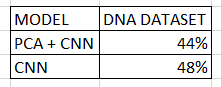

Terlihat pada tabel diatas, CNN mengungguli dibanding dengan PCA+CNN. PCA+CNN mendapatkan hasil 44%. Sedangkan CNN mendapatkan hasil 48%. Model CNN dapat ditingkatkan dengan mengubah konfigurasi CNNnya dan juga mengatur jumlah Batch Learning dan epoch. Sedangkan Model PCA+CNN juga akan berubah tergantung dengan N_componentsnya. Menurut saya , CNN dapat menghasilkan yang lebih bagus karena  ini terjadi karena PCA sendiri sudah menyederhanakan data dan dapat mengurangi redudansi menjadi data dengan varian yang lebih maksimal, yaitu yang awalnya variable nya berkolerasi, menjadi variable yang bebas atau tidak berkolerasi sehingga hasil kurang bagus. Dengan dataset yang tidak terlalu besar , PCA kurang dapat dipakai dengan optimal.